# **Plots for the case of monotonic velocity limitation for y+ = 50 and 100**

The following aspects will be demonstrated in this notebook.

1. Skin friction

2. Residuals for U, p, and nuTilda

3. Field analysis

The relaxation factor for U is 0.4 and for p is 0.5.

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"
output = "output"
!mkdir -p $output

## Skin friction plot

In [2]:
UInf = 69.4
nuInf = 1.388e-05

model_sa = "SpalartAllmaras"
yp = ['50', '100']
res_list = ['1e-5']

In [3]:
tauw_path_ddface = [run + 'turbulentFlatPlate_velLimit_pRel_1000iter/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddface = [pd.read_csv(tauw_path_ddface[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddface = [tauw_data_ddface[i + len(res_list)*j].replace("Inf", 0) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddface[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,actFaceCorr,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,4.236887,3.301088e-16,0.000059,4.581911e-21,1.157697e+06,1.833426e-13,-0.000014,273242.394390,1416.974985,1,68.543332,0.203570,68.897840,0.229454,28.191027,22.962012,0.182489,1.025367
1,0.001458,4.200398,9.725877e-16,0.000058,1.349952e-20,1.136515e+06,9.826551e-13,-0.000014,270573.204241,3400.057538,1,67.873328,0.315267,68.726135,0.328768,21.664239,18.106287,0.182489,1.015139
2,0.002433,4.159811,6.289178e-15,0.000058,8.729379e-20,1.112917e+06,7.533273e-12,-0.000014,267540.386893,5635.287569,1,67.112168,0.384435,68.525792,0.380895,16.317890,14.373476,0.182489,1.003519
3,0.003410,4.116948,5.616704e-14,0.000057,7.795985e-19,1.087945e+06,6.944789e-11,-0.000014,264260.034018,7989.352002,1,66.289016,0.425693,68.293097,0.408833,14.051666,12.841574,0.182489,0.990949
4,0.004390,4.070299,5.813482e-13,0.000056,8.069113e-18,1.061802e+06,7.024160e-10,-0.000014,260865.808563,10385.757010,1,65.437381,0.450561,68.042555,0.425273,12.440185,11.640950,0.182489,0.977944


In [4]:
x0 = 0
Rex = (tauw_data_ddface[0]['ccx'] - x0)*UInf/nuInf
Cf_ddface = [tauw_data_ddface[i + len(res_list)*j]['nuEff_wall']*tauw_data_ddface[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

In [5]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


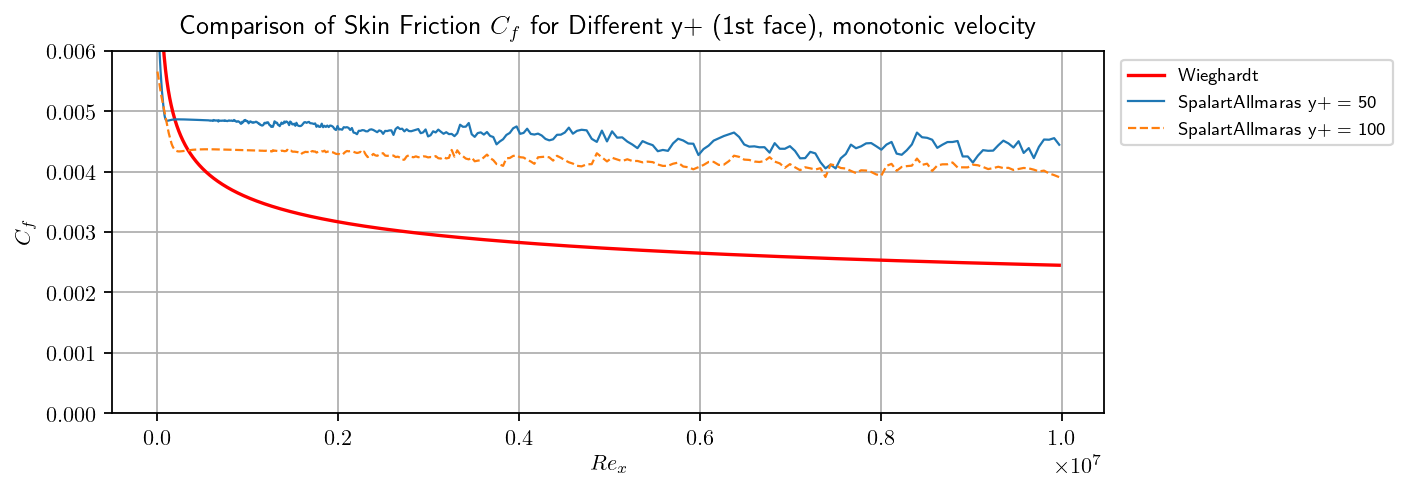

In [6]:
style_cf = ["-", "--", "-.", ":"]
lw = 1.0
stylecycler = cycle(style_cf)

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax.set_xlabel(r"$Re_x$")
ax.set_ylabel(r"$C_f$")
plt.title(r"Comparison of Skin Friction $C_f$ for Different y+ (1st face), monotonic velocity")
ax.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax.plot(Rex, Cf_ddface[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw)
        ax.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))

## Residual plots

In [7]:
solverInfo_path = [run + 'turbulentFlatPlate_velLimit_pRel_1000iter/yplus_{}/solverInfo_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data = [pd.read_csv(solverInfo_path[i + len(res_list)*j], delim_whitespace=True, skiprows = 1) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data[0].head()

,Time,U_solver,Ux_initial,Ux_final,Ux_iters,Uy_initial,Uy_final,Uy_iters,U_converged,nuTilda_solver,nuTilda_initial,nuTilda_final,nuTilda_iters,nuTilda_converged,p_solver,p_initial,p_final,p_iters,p_converged
0,1,smoothSolver,0.999999,0.000060,1,0.000000,0.000000,0,False,smoothSolver,1.000000,0.053058,2,True,GAMG,1.000000,0.090745,10,True
1,2,smoothSolver,0.112435,0.000021,1,0.384474,0.000116,1,False,smoothSolver,0.164527,0.002701,2,True,GAMG,0.004648,0.000289,10,True
2,3,smoothSolver,0.076858,0.000026,1,0.277612,0.000085,1,False,smoothSolver,0.090412,0.003553,1,True,GAMG,0.002414,0.000161,8,True
3,4,smoothSolver,0.058336,0.000023,1,0.196634,0.000061,1,False,smoothSolver,0.034728,0.002197,1,True,GAMG,0.001798,0.000135,3,True
4,5,smoothSolver,0.044103,0.000021,1,0.138448,0.000044,1,False,smoothSolver,0.020856,0.001404,1,True,GAMG,0.001559,0.000081,8,True


In [8]:
Ux_init_res = [solverInfo_data[i + len(res_list)*j]['Ux_initial'] for j in range(len(yp)) for i in range(len(res_list))]
Uy_init_res = [solverInfo_data[i + len(res_list)*j]['Uy_initial'] for j in range(len(yp)) for i in range(len(res_list))]
p_init_res = [solverInfo_data[i + len(res_list)*j]['p_initial'] for j in range(len(yp)) for i in range(len(res_list))]
nuTilda_init_res = [solverInfo_data[i + len(res_list)*j]['nuTilda_initial'] for j in range(len(yp)) for i in range(len(res_list))]
t = [solverInfo_data[i + len(res_list)*j]['Time'] for j in range(len(yp)) for i in range(len(res_list))]

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


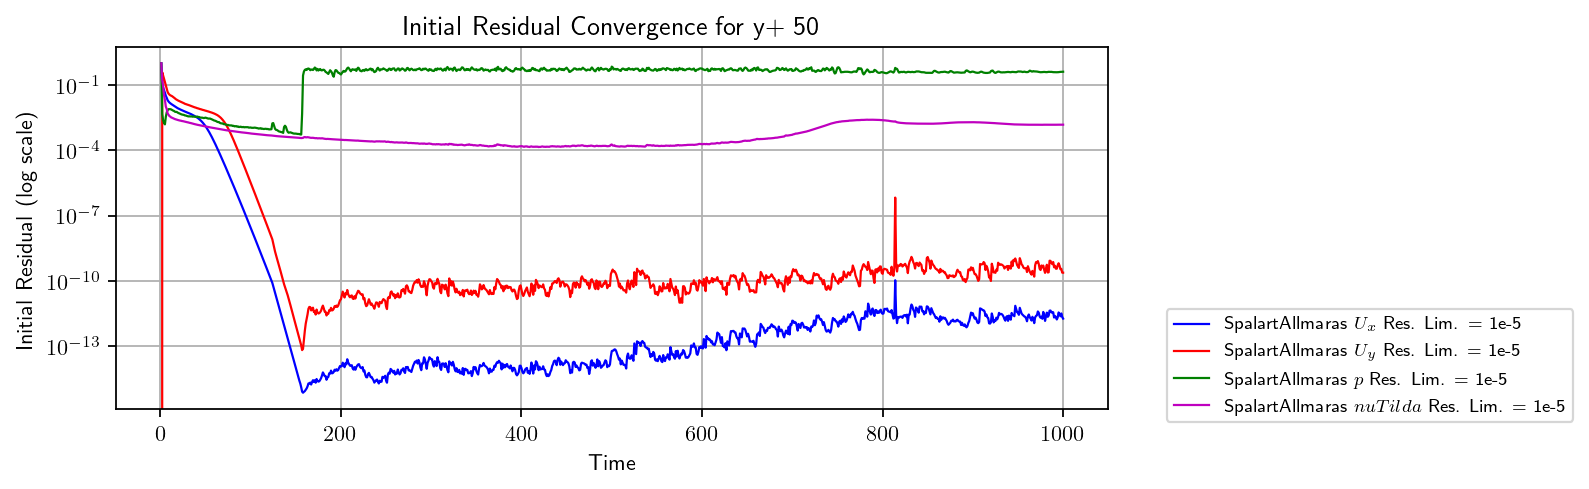

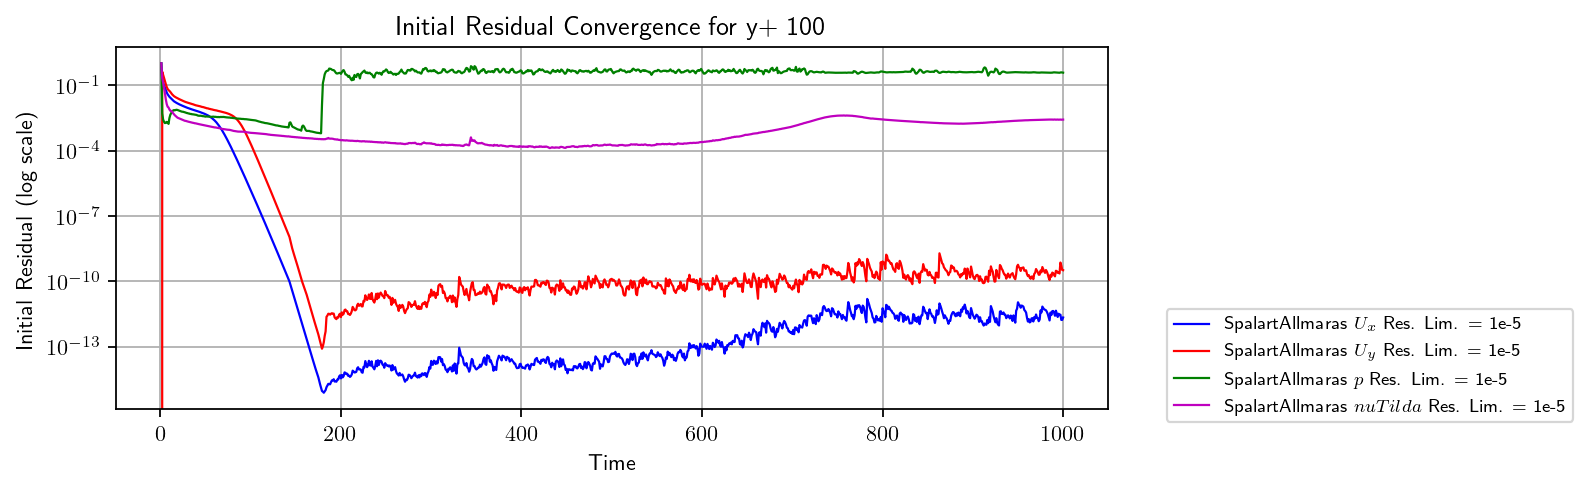

In [9]:
lw2 = 1.0
for j in range(len(yp)):
    for i in range(len(res_list)):
        fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
        plt.yscale("log")
        plt.grid()
        plt.title("Initial Residual Convergence for y+ {}".format(yp[j]))
        ax2.set_xlabel("Time")
        ax2.set_ylabel("Initial Residual (log scale)")
        ax2.plot(t[i + len(res_list)*j], Ux_init_res[i + len(res_list)*j], color = 'b', label = "{} $U_x$ Res. Lim. = {}".format(model_sa, res_list[i]), lw = lw2)
        ax2.plot(t[i + len(res_list)*j], Uy_init_res[i + len(res_list)*j], color = 'r', label = "{} $U_y$ Res. Lim. = {}".format(model_sa, res_list[i]), lw = lw2)
        ax2.plot(t[i + len(res_list)*j], p_init_res[i + len(res_list)*j], color = 'g', label = "{} $p$ Res. Lim. = {}".format(model_sa, res_list[i]), lw = lw2)
        ax2.plot(t[i + len(res_list)*j], nuTilda_init_res[i + len(res_list)*j], color = 'm', label = "{} $nuTilda$ Res. Lim. = {}".format(model_sa, res_list[i]), lw = lw2)
        ax2.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.3))        

## Field analysis for 1000 iteration steps

In [10]:
it = 1000

yp50_face_path = [run + 'turbulentFlatPlate_velLimit_pRel_1000iter/yplus_50/50yp_surfaceFields_iter_{}.csv'.format(i) for i in range(1, it + 1)]
yp50_face_data = [pd.read_csv(yp50_face_path[j], delim_whitespace=False) for j in range(it)]
yp50_face_data[1].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,actFaceCorr,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,4.274389,2.594122e-16,0.000059,3.600641e-21,1.179441e+06,3.682075e-14,-0.000014,275932.089827,360.351772,1,69.218351,0.010337,69.308665,0.014159,29.347947,28.784607,0.182489,1.035673
1,0.001458,4.270861,2.337857e-16,0.000059,3.244945e-21,1.177396e+06,4.276642e-14,-0.000014,275681.279368,497.933715,1,69.155435,0.006137,69.280313,0.008877,28.375132,28.041450,0.182489,1.034712
2,0.002433,4.269213,2.090515e-16,0.000059,2.901635e-21,1.176441e+06,4.586895e-14,-0.000014,275563.934453,558.496244,1,69.125999,0.003150,69.266089,0.004810,27.241735,27.070828,0.182489,1.034262
3,0.003410,4.268428,2.749237e-16,0.000059,3.815941e-21,1.175986e+06,4.742484e-14,-0.000014,275508.042910,584.539398,1,69.111978,0.001615,69.258609,0.002589,26.320508,26.233103,0.182489,1.034048
4,0.004390,4.268039,2.445187e-16,0.000059,3.393920e-21,1.175761e+06,4.821640e-14,-0.000014,275480.307948,595.986001,1,69.105021,0.000874,69.254525,0.001462,25.613401,25.566198,0.182489,1.033941


In [11]:
yp100_face_path = [run + 'turbulentFlatPlate_velLimit_pRel_1000iter/yplus_100/100yp_surfaceFields_iter_{}.csv'.format(i) for i in range(1, it + 1)]
yp100_face_data = [pd.read_csv(yp100_face_path[j], delim_whitespace=False) for j in range(it)]
yp100_face_data[1].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,actFaceCorr,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,7.496741,8.021662e-16,0.000104,1.113407e-20,995129.261575,2.406706e-14,-0.000014,132741.581092,70.310689,1,69.326030,0.006384,69.362698,0.008358,25.023109,24.304354,0.383691,1.037317
1,0.001458,7.494240,7.386897e-16,0.000104,1.025301e-20,994468.075935,2.574255e-14,-0.000014,132697.660657,95.249848,1,69.303092,0.004535,69.352809,0.006235,24.427928,23.918558,0.383691,1.036967
2,0.002433,7.492987,7.188947e-16,0.000104,9.978258e-21,994137.022451,2.662523e-14,-0.000014,132675.658867,107.431108,1,69.291602,0.002771,69.347695,0.004044,23.629890,23.319396,0.383691,1.036791
3,0.003410,7.492324,6.396381e-16,0.000104,8.878177e-21,993961.701722,2.710501e-14,-0.000014,132664.004097,113.304393,1,69.285515,0.001649,69.344683,0.002552,22.931587,22.747286,0.383691,1.036698
4,0.004390,7.491958,6.113478e-16,0.000104,8.485508e-21,993865.016478,2.737331e-14,-0.000014,132657.575887,116.134997,1,69.282158,0.001007,69.342807,0.001642,22.371346,22.259076,0.383691,1.036647


### y+ = 50

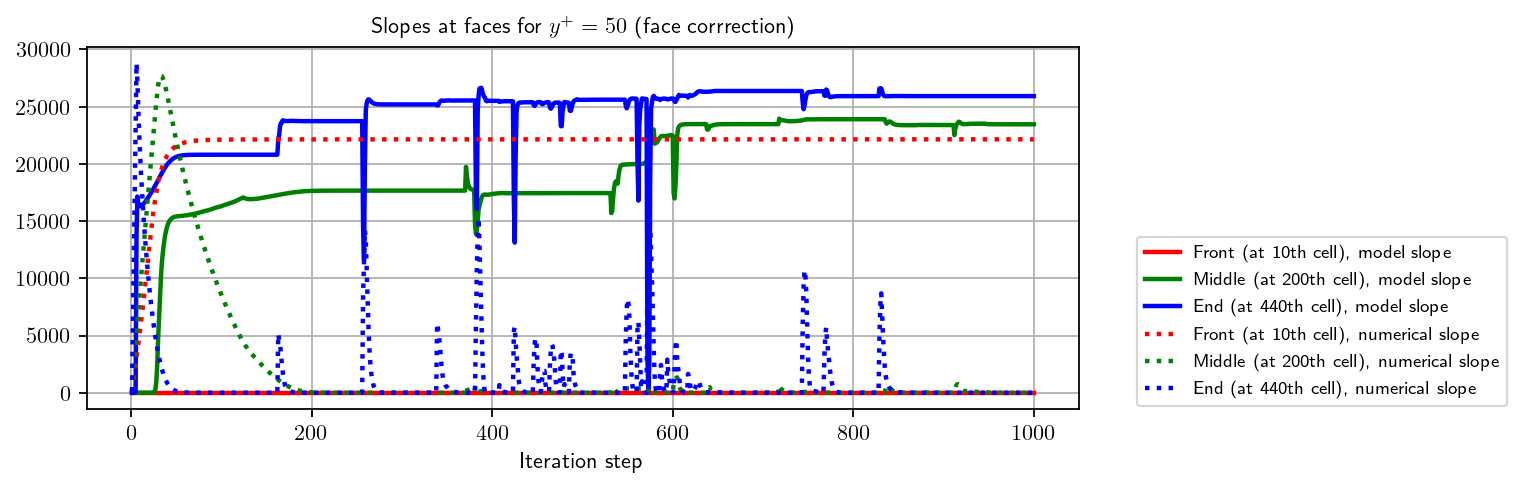

In [12]:
style = ["-", "--", ":", "-."]
lw3 = 2.0

fig_face, ax_face = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax_face.set_xlabel("Iteration step")
plt.title(r"Slopes at faces for $y^+ = 50$ (face corrrection)", fontsize = 10)
ax_face.plot([i+1 for i in range(it)], [yp50_face_data[j]['face_slope'][9] for j in range(it)], ls = style[0], c = "r", lw = lw3, label = "Front (at 10th cell), model slope")
ax_face.plot([i+1 for i in range(it)], [yp50_face_data[j]['face_slope'][199] for j in range(it)], ls = style[0], c = "g", lw = lw3, label = "Middle (at 200th cell), model slope")
ax_face.plot([i+1 for i in range(it)], [yp50_face_data[j]['face_slope'][439] for j in range(it)], ls = style[0], c = "b", lw = lw3, label = "End (at 440th cell), model slope")
ax_face.plot([i+1 for i in range(it)], [yp50_face_data[j]['magGradU_face'][9] for j in range(it)], ls = style[2], c = "r", lw = lw3, label = "Front (at 10th cell), numerical slope")
ax_face.plot([i+1 for i in range(it)], [yp50_face_data[j]['magGradU_face'][199] for j in range(it)], ls = style[2], c = "g", lw = lw3, label = "Middle (at 200th cell), numerical slope")
ax_face.plot([i+1 for i in range(it)], [yp50_face_data[j]['magGradU_face'][439] for j in range(it)], ls = style[2], c = "b", lw = lw3, label = "End (at 440th cell), numerical slope")
plt.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.5))

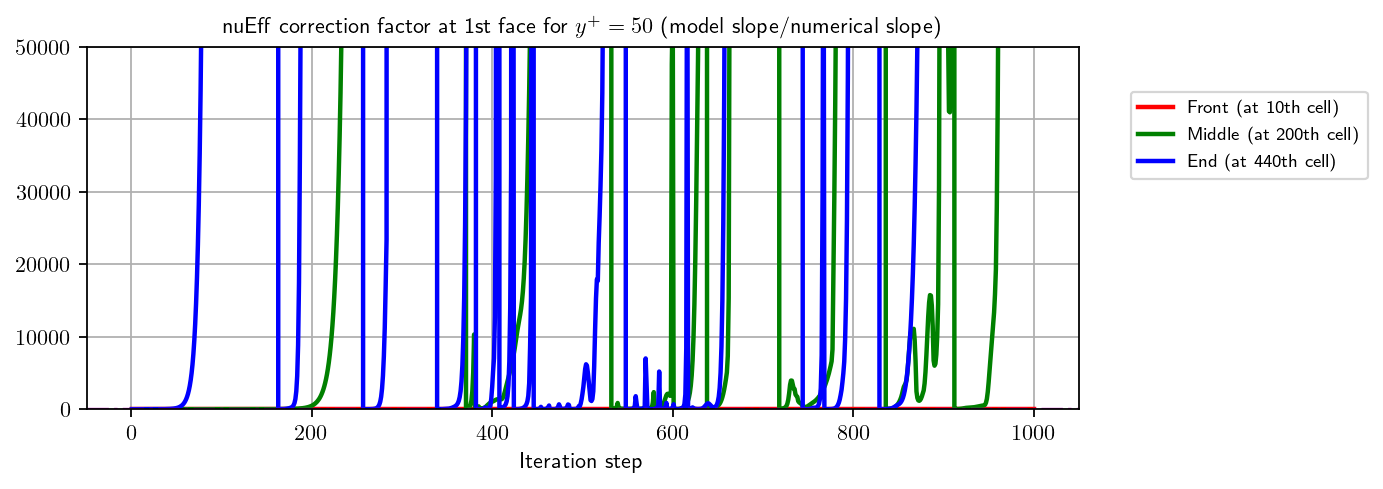

In [13]:
fig_face2, ax_face2 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax_face2.set_xlabel("Iteration step")
plt.ylim([0, 50000])
plt.title(r"nuEff correction factor at 1st face for $y^+ = 50$ (model slope/numerical slope)", fontsize = 10)
ax_face2.plot([i+1 for i in range(it)], [yp50_face_data[j]['face_slope'][9]/yp50_face_data[j]['magGradU_face'][9] for j in range(it)], ls = style[0], c = "r", lw = lw3, label = "Front (at 10th cell)")
ax_face2.plot([i+1 for i in range(it)], [yp50_face_data[j]['face_slope'][199]/yp50_face_data[j]['magGradU_face'][199] for j in range(it)], ls = style[0], c = "g", lw = lw3, label = "Middle (at 200th cell)")
ax_face2.plot([i+1 for i in range(it)], [yp50_face_data[j]['face_slope'][439]/yp50_face_data[j]['magGradU_face'][439] for j in range(it)], ls = style[0], c = "b", lw = lw3, label = "End (at 440th cell)")
ax_face2.axhline(y = 1.0, ls = style[3], c = "m")
plt.legend(fontsize = 8, bbox_to_anchor=(1.3, 0.9))

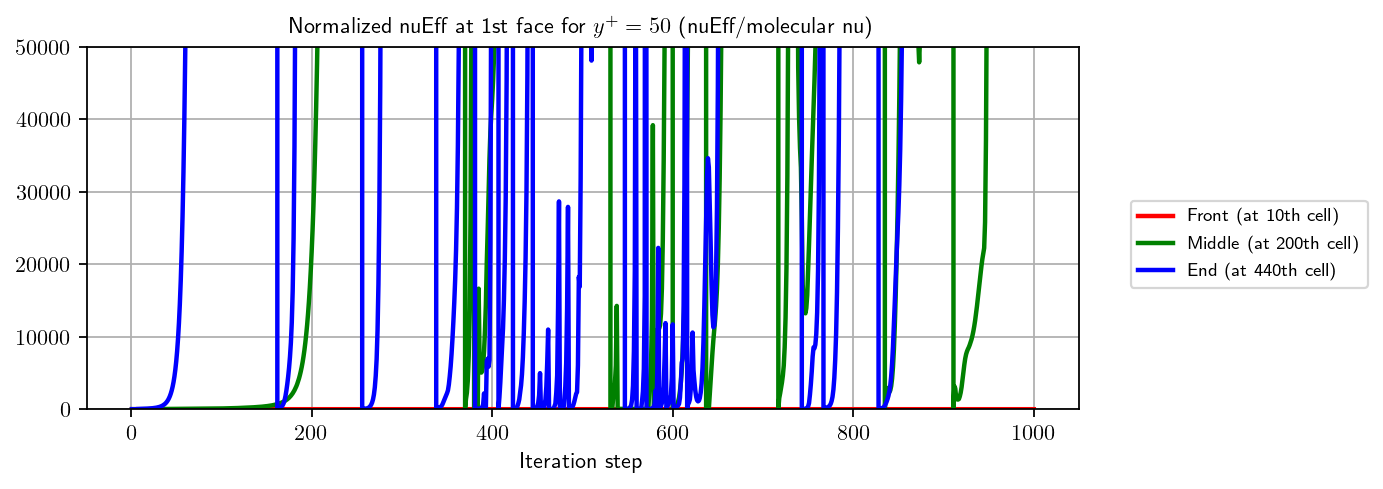

In [14]:
fig_face3, ax_face3 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax_face3.set_xlabel("Iteration step")
plt.ylim([0, 50000])
plt.title(r"Normalized nuEff at 1st face for $y^+ = 50$ (nuEff/molecular nu)", fontsize = 10)
ax_face3.plot([i+1 for i in range(it)], [yp50_face_data[j]['nuEff_face_norm'][9] for j in range(it)], ls = style[0], c = "r", lw = lw3, label = "Front (at 10th cell)")
ax_face3.plot([i+1 for i in range(it)], [yp50_face_data[j]['nuEff_face_norm'][199] for j in range(it)], ls = style[0], c = "g", lw = lw3, label = "Middle (at 200th cell)")
ax_face3.plot([i+1 for i in range(it)], [yp50_face_data[j]['nuEff_face_norm'][439] for j in range(it)], ls = style[0], c = "b", lw = lw3, label = "End (at 440th cell)")
plt.legend(fontsize = 8, bbox_to_anchor=(1.3, 0.6))

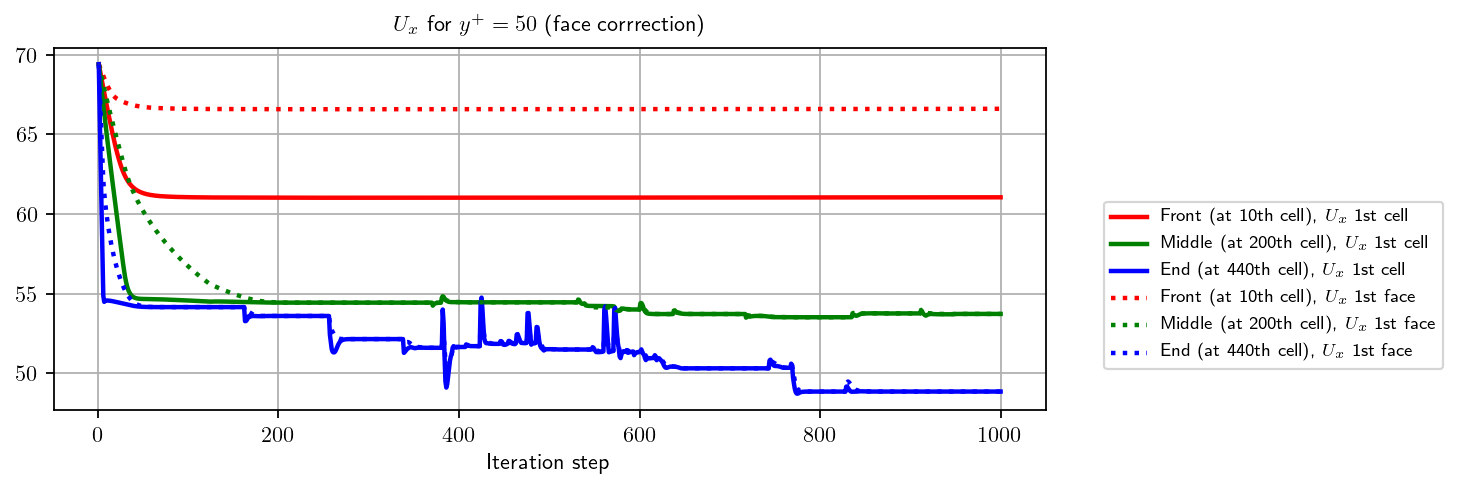

In [15]:
fig_face4, ax_face4 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax_face4.set_xlabel("Iteration step")
plt.title(r"$U_x$ for $y^+ = 50$ (face corrrection)", fontsize = 10)
ax_face4.plot([i+1 for i in range(it)], [yp50_face_data[j]['Ux_1st_cell'][9] for j in range(it)], ls = style[0], c = "r", lw = lw3, label = r"Front (at 10th cell), $U_x$ 1st cell")
ax_face4.plot([i+1 for i in range(it)], [yp50_face_data[j]['Ux_1st_cell'][199] for j in range(it)], ls = style[0], c = "g", lw = lw3, label = r"Middle (at 200th cell), $U_x$ 1st cell")
ax_face4.plot([i+1 for i in range(it)], [yp50_face_data[j]['Ux_1st_cell'][439] for j in range(it)], ls = style[0], c = "b", lw = lw3, label = r"End (at 440th cell), $U_x$ 1st cell")
ax_face4.plot([i+1 for i in range(it)], [yp50_face_data[j]['Ux_1st_face'][9] for j in range(it)], ls = style[2], c = "r", lw = lw3, label = r"Front (at 10th cell), $U_x$ 1st face")
ax_face4.plot([i+1 for i in range(it)], [yp50_face_data[j]['Ux_1st_face'][199] for j in range(it)], ls = style[2], c = "g", lw = lw3, label = r"Middle (at 200th cell), $U_x$ 1st face")
ax_face4.plot([i+1 for i in range(it)], [yp50_face_data[j]['Ux_1st_face'][439] for j in range(it)], ls = style[2], c = "b", lw = lw3, label = r"End (at 440th cell), $U_x$ 1st face")
plt.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.6))

### y+ = 100

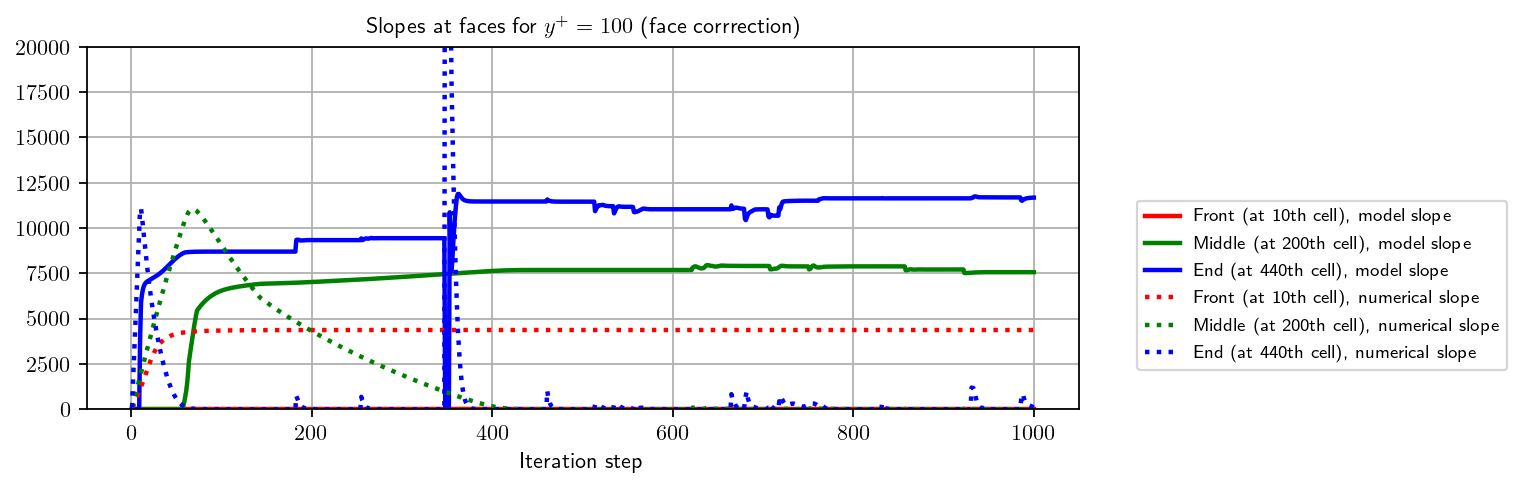

In [20]:
fig_face5, ax_face5 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax_face5.set_xlabel("Iteration step")
plt.ylim([0, 20000])
plt.title(r"Slopes at faces for $y^+ = 100$ (face corrrection)", fontsize = 10)
ax_face5.plot([i+1 for i in range(it)], [yp100_face_data[j]['face_slope'][9] for j in range(it)], ls = style[0], c = "r", lw = lw3, label = "Front (at 10th cell), model slope")
ax_face5.plot([i+1 for i in range(it)], [yp100_face_data[j]['face_slope'][199] for j in range(it)], ls = style[0], c = "g", lw = lw3, label = "Middle (at 200th cell), model slope")
ax_face5.plot([i+1 for i in range(it)], [yp100_face_data[j]['face_slope'][439] for j in range(it)], ls = style[0], c = "b", lw = lw3, label = "End (at 440th cell), model slope")
ax_face5.plot([i+1 for i in range(it)], [yp100_face_data[j]['magGradU_face'][9] for j in range(it)], ls = style[2], c = "r", lw = lw3, label = "Front (at 10th cell), numerical slope")
ax_face5.plot([i+1 for i in range(it)], [yp100_face_data[j]['magGradU_face'][199] for j in range(it)], ls = style[2], c = "g", lw = lw3, label = "Middle (at 200th cell), numerical slope")
ax_face5.plot([i+1 for i in range(it)], [yp100_face_data[j]['magGradU_face'][439] for j in range(it)], ls = style[2], c = "b", lw = lw3, label = "End (at 440th cell), numerical slope")
plt.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.6))

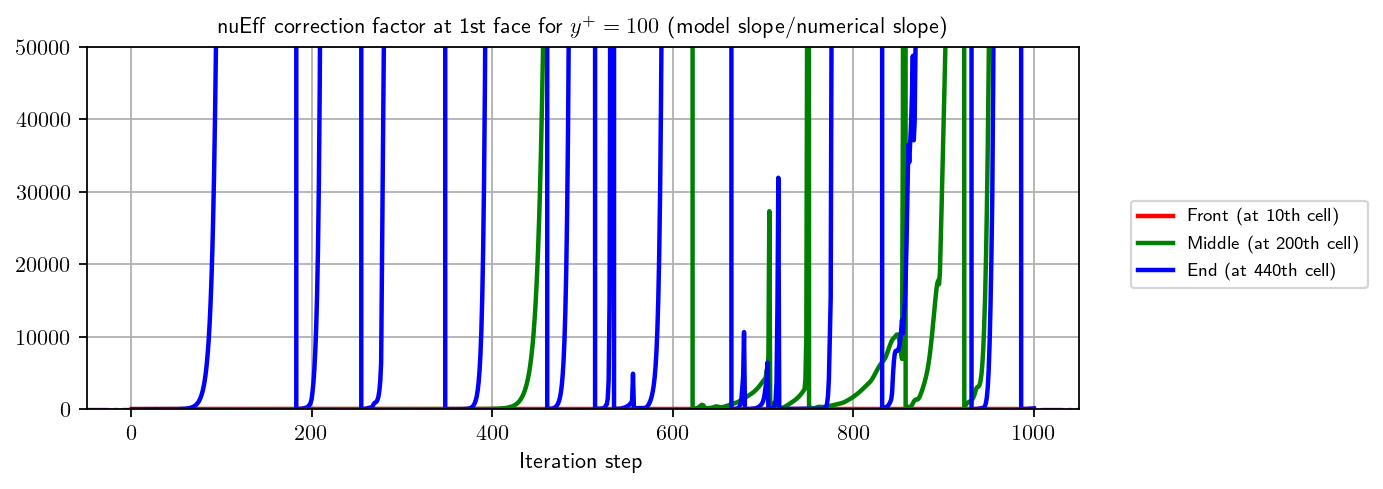

In [17]:
fig_face6, ax_face6 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax_face6.set_xlabel("Iteration step")
plt.ylim([0, 50000])
plt.title(r"nuEff correction factor at 1st face for $y^+ = 100$ (model slope/numerical slope)", fontsize = 10)
ax_face6.plot([i+1 for i in range(it)], [yp100_face_data[j]['face_slope'][9]/yp100_face_data[j]['magGradU_face'][9] for j in range(it)], ls = style[0], c = "r", lw = lw3, label = "Front (at 10th cell)")
ax_face6.plot([i+1 for i in range(it)], [yp100_face_data[j]['face_slope'][199]/yp100_face_data[j]['magGradU_face'][199] for j in range(it)], ls = style[0], c = "g", lw = lw3, label = "Middle (at 200th cell)")
ax_face6.plot([i+1 for i in range(it)], [yp100_face_data[j]['face_slope'][439]/yp100_face_data[j]['magGradU_face'][439] for j in range(it)], ls = style[0], c = "b", lw = lw3, label = "End (at 440th cell)")
ax_face6.axhline(y = 1.0, ls = style[3], c = "m")
plt.legend(fontsize = 8, bbox_to_anchor=(1.3, 0.6))

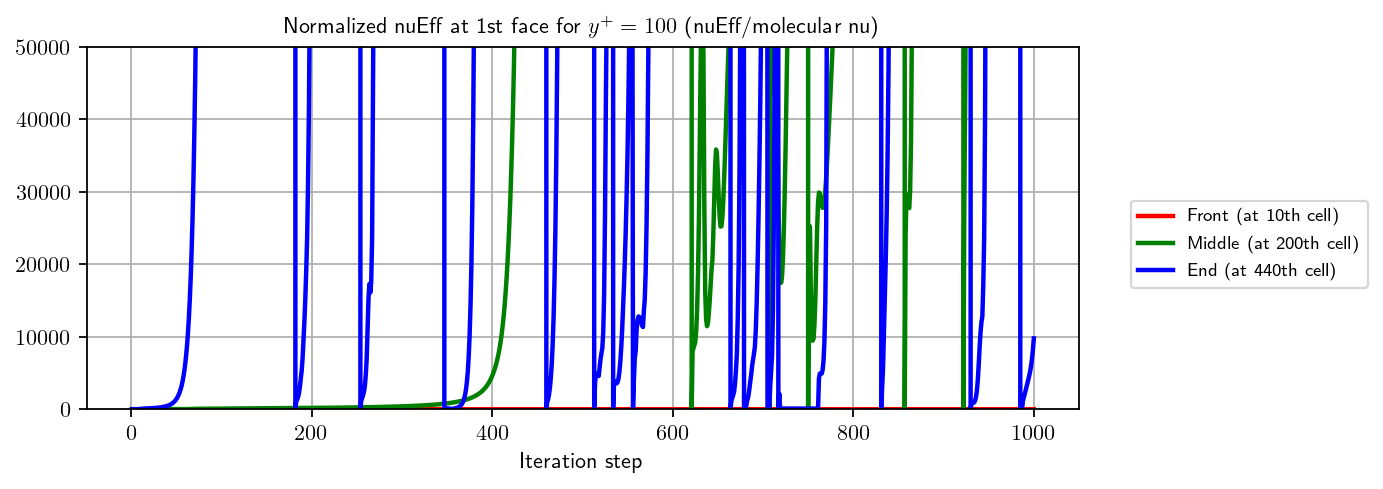

In [18]:
fig_face7, ax_face7 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax_face7.set_xlabel("Iteration step")
plt.ylim([0, 50000])
plt.title(r"Normalized nuEff at 1st face for $y^+ = 100$ (nuEff/molecular nu)", fontsize = 10)
ax_face7.plot([i+1 for i in range(it)], [yp100_face_data[j]['nuEff_face_norm'][9] for j in range(it)], ls = style[0], c = "r", lw = lw3, label = "Front (at 10th cell)")
ax_face7.plot([i+1 for i in range(it)], [yp100_face_data[j]['nuEff_face_norm'][199] for j in range(it)], ls = style[0], c = "g", lw = lw3, label = "Middle (at 200th cell)")
ax_face7.plot([i+1 for i in range(it)], [yp100_face_data[j]['nuEff_face_norm'][439] for j in range(it)], ls = style[0], c = "b", lw = lw3, label = "End (at 440th cell)")
plt.legend(fontsize = 8, bbox_to_anchor=(1.3, 0.6))

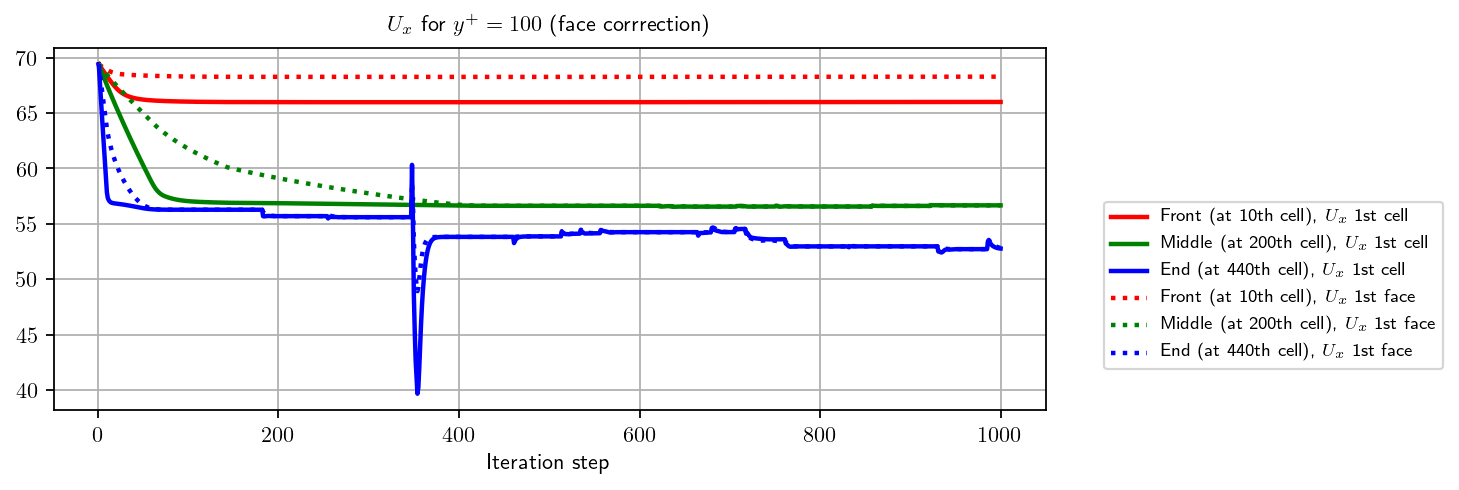

In [19]:
fig_face8, ax_face8 = plt.subplots(1, 1, figsize=(8, 3))    
plt.grid()
ax_face8.set_xlabel("Iteration step")
plt.title(r"$U_x$ for $y^+ = 100$ (face corrrection)", fontsize = 10)
ax_face8.plot([i+1 for i in range(it)], [yp100_face_data[j]['Ux_1st_cell'][9] for j in range(it)], ls = style[0], c = "r", lw = lw3, label = r"Front (at 10th cell), $U_x$ 1st cell")
ax_face8.plot([i+1 for i in range(it)], [yp100_face_data[j]['Ux_1st_cell'][199] for j in range(it)], ls = style[0], c = "g", lw = lw3, label = r"Middle (at 200th cell), $U_x$ 1st cell")
ax_face8.plot([i+1 for i in range(it)], [yp100_face_data[j]['Ux_1st_cell'][439] for j in range(it)], ls = style[0], c = "b", lw = lw3, label = r"End (at 440th cell), $U_x$ 1st cell")
ax_face8.plot([i+1 for i in range(it)], [yp100_face_data[j]['Ux_1st_face'][9] for j in range(it)], ls = style[2], c = "r", lw = lw3, label = r"Front (at 10th cell), $U_x$ 1st face")
ax_face8.plot([i+1 for i in range(it)], [yp100_face_data[j]['Ux_1st_face'][199] for j in range(it)], ls = style[2], c = "g", lw = lw3, label = r"Middle (at 200th cell), $U_x$ 1st face")
ax_face8.plot([i+1 for i in range(it)], [yp100_face_data[j]['Ux_1st_face'][439] for j in range(it)], ls = style[2], c = "b", lw = lw3, label = r"End (at 440th cell), $U_x$ 1st face")
plt.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.6))